In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

r = requests.get('https://covidtracking.com/api/states/daily')
a = json.loads(r.text)
res = json_normalize(a)
##print(res)
df = pd.DataFrame(res)
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')



C:\Users\flip\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


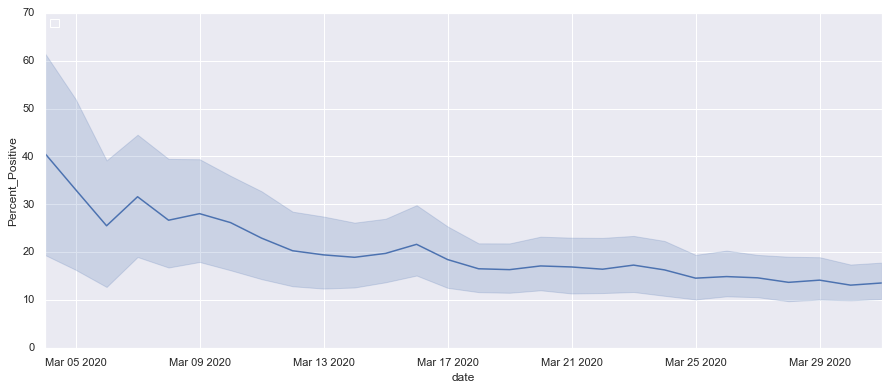

In [2]:
sns.set(rc={'figure.figsize':(15,6)})
df['Percent_Positive'] = 100*df['positive']/df['totalTestResults']
sns.lineplot(data=df, x='date', y='Percent_Positive')
plt.legend(loc=2)
plt.show()

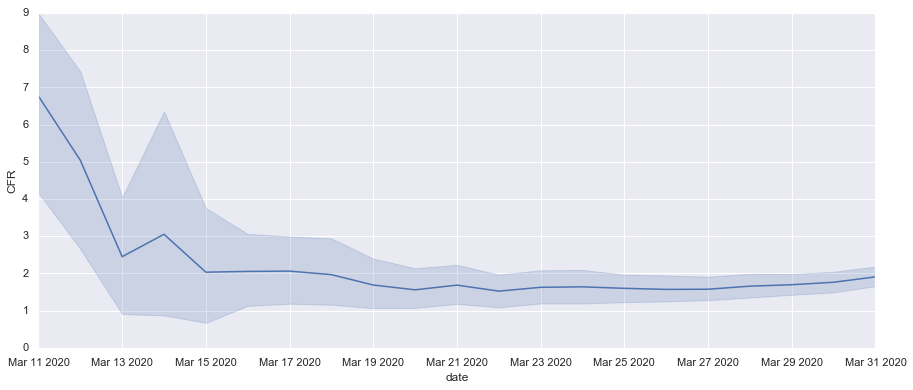

In [3]:
sns.set(rc={'figure.figsize':(15,6)})
df['CFR'] = 100*df['death']/df['positive']
sns.lineplot(data=df, x='date', y='CFR')
plt.show()

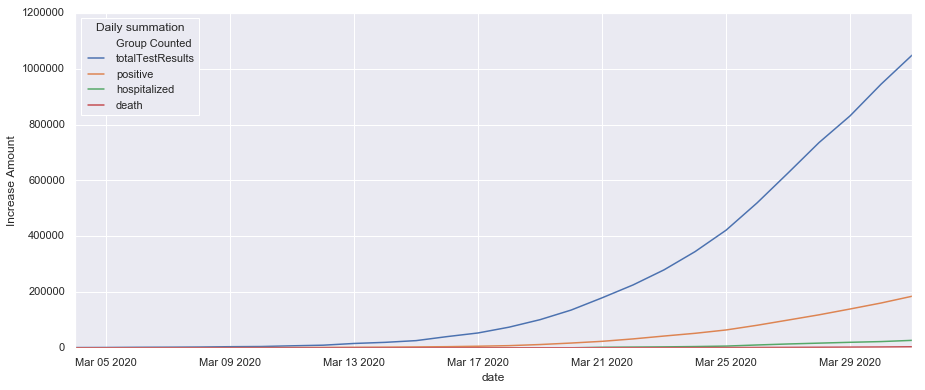

In [4]:
sns.set(rc={'figure.figsize':(15,6)})
df_2 = df.groupby('date')['totalTestResults', 'positive', 'hospitalized', 'death'].sum().reset_index()
sns.lineplot(x='date', y="Increase Amount", hue="Group Counted", 
             data=pd.melt(df_2, ['date'], value_name="Increase Amount", var_name="Group Counted"))
plt.legend(loc=2, title="Daily summation")

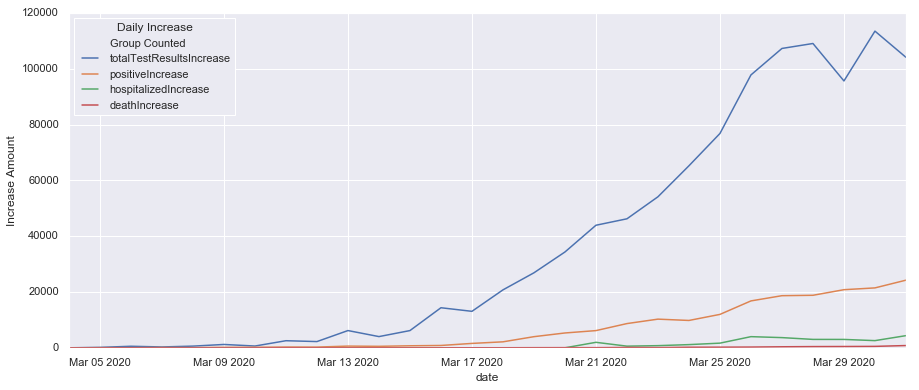

In [5]:
sns.set(rc={'figure.figsize':(15,6)})
df_2 = df.groupby('date')['totalTestResultsIncrease', 'positiveIncrease', 'hospitalizedIncrease', 'deathIncrease'].sum().reset_index()
sns.lineplot(x='date', y="Increase Amount", hue="Group Counted", 
             data=pd.melt(df_2, ['date'], value_name="Increase Amount", var_name="Group Counted"))
plt.legend(loc=2, title="Daily Increase")

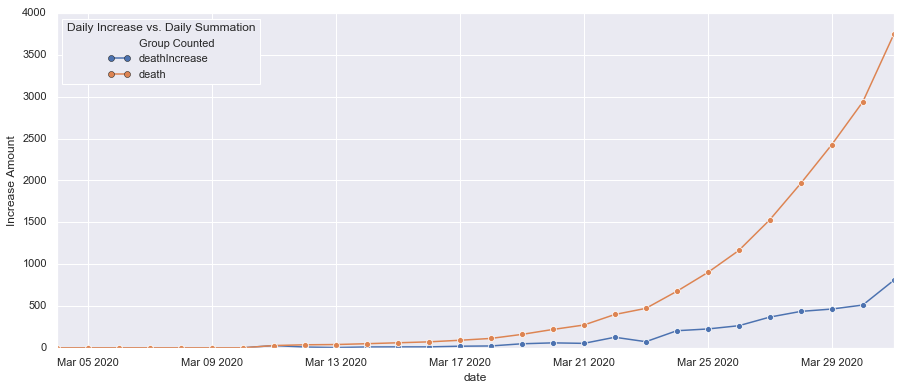

In [7]:
sns.set(rc={'figure.figsize':(15,6)})
df_2 = df.groupby('date')['deathIncrease', 'death'].sum().reset_index()
sns.lineplot(x='date', y="Increase Amount", hue="Group Counted", style="Group Counted", markers=["o", "o"], dashes=False, 
             data=pd.melt(df_2, ['date'], value_name="Increase Amount", var_name="Group Counted"))
plt.legend(loc=2, title="Daily Increase vs. Daily Summation")